In [1]:
from datetime import datetime, timedelta
import numpy as np
import random
import networkx as nx
from itertools import combinations, permutations

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from collections import defaultdict

import copy

from simulation_core.infrastructure import *
from simulation_core.signaling import *
from simulation_core.network import *
from simulation_core.train.Train import Train
from simulation_core.train.TrainList import TrainList
from simulation_core.network.System.System import System

from simulation_test.sim import *
from simulation_core.network.network_utils import all_simple_paths, shortest_path

from simulation_test.simulation_configs import *




sys = System(sim_init_time, spd_container, acc_container, dcc_container,
             term_time=sim_term_time,
             dos_period=dos_period,  
             dos_pos=dos_pos,
             headway=headway, 
             refresh_time=refresh_time)

In [2]:
_exception = None
def launch(sys, downtrain=True, same_train_set=True):
    global _exception
    try:
        spd_list, acc_list, dcc_list = max_spd_list.copy(), max_acc_list.copy(), max_dcc_list.copy()
        while sys.sys_time - sys.init_time <= sys.term_time - sys.init_time:
            _semaphore_to_return = False
            for t in sys.trains:
                sys.dispatcher.request_routing(t)
                t.move()
            if sys.sys_time+sys.refresh_time - sys.last_train_init_time >= sys.headway:
                if downtrain:
                    if not sys.signal_points[0].curr_train_with_route.keys():
                        if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[0],0)) for t in sys.trains]):
                            if not sys.signal_points[0].track_by_port[1].trains:
                                if same_train_set:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[0],0,
                                        sys.signal_points[10],1,
                                        max_spd=spd_list.pop(0),
                                        max_acc=acc_list.pop(0),
                                        max_dcc=dcc_list.pop(0))
                                else:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[0],0,
                                        sys.signal_points[10],1,
                                        length=1)
                else:
                    if not sys.signal_points[10].curr_train_with_route.keys():
                        if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[10],1)) for t in sys.trains]):
                            if not sys.signal_points[10].track_by_port[0].trains:
                                if same_train_set:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[10],1,
                                        sys.signal_points[0],0,
                                        max_spd=spd_list.pop(0),
                                        max_acc=acc_list.pop(0),
                                        max_dcc=dcc_list.pop(0))
                                else:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[10],1,
                                        sys.signal_points[0],0,
                                        length=1)
            sys.sys_time+=sys.refresh_time
    except Exception as e:
        _exception = e
        print('{0} [ERROR]: Exception: {1}'.format(timestamper(sys.sys_time), e))
    return sys

[2018-01-10 10:04:10] [INFO]: new train generated WITHOUT init track.
[2018-01-10 10:05:00] [INFO]: Train idx: 0 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00, 
	requested (0, 1) at 0.0
[2018-01-10 10:05:00] [INFO]: route (0, 1) of CtrlPnt 0 is opened
[2018-01-10 10:05:00] [INFO]: Train idx: 0 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00 initiated, 
	entering into Track <MP:  0.0~5.0  > <CtrlPnt 0 port: 1~AutoPnt 1 port: 0> key: 0
[2018-01-10 10:05:00] [INFO]: route (0, 1) of CtrlPnt 0 is closed
[2018-01-10 10:05:50] [INFO]: Train idx: 0 occupying:[((CtrlPnt 0, 1), (AutoPnt 1, 0)), ((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00, 
	requested (0, 1) at 10.0
[2018-01-10 10:05:50] [INFO]: route (0, 1) of CtrlPnt 2 is opened
[2018-01-10 10:20:50] [INFO]: new train generated WITHOUT init track.
[2018-01-10 10:21:40] [INFO]: Train idx: 1 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00, 
	requested (0, 1) at

No handles with labels found to put in legend.


[2018-01-10 11:35:50] [ERROR]: Exception: 
	Assertion Error: braking distance 0.0345679012345679 at 14.990073779589434 
	is greater than distance (0.009926220410566344) to current signal HomeSig port: 0 of CtrlPnt 3, aspect Aspect: r, 	 route None, target speed 0.0 mph
	Train idx: 2 occupying:[((CtrlPnt 2, 1), (CtrlPnt 3, 0))] head MP:14.99 rear MP:13.99


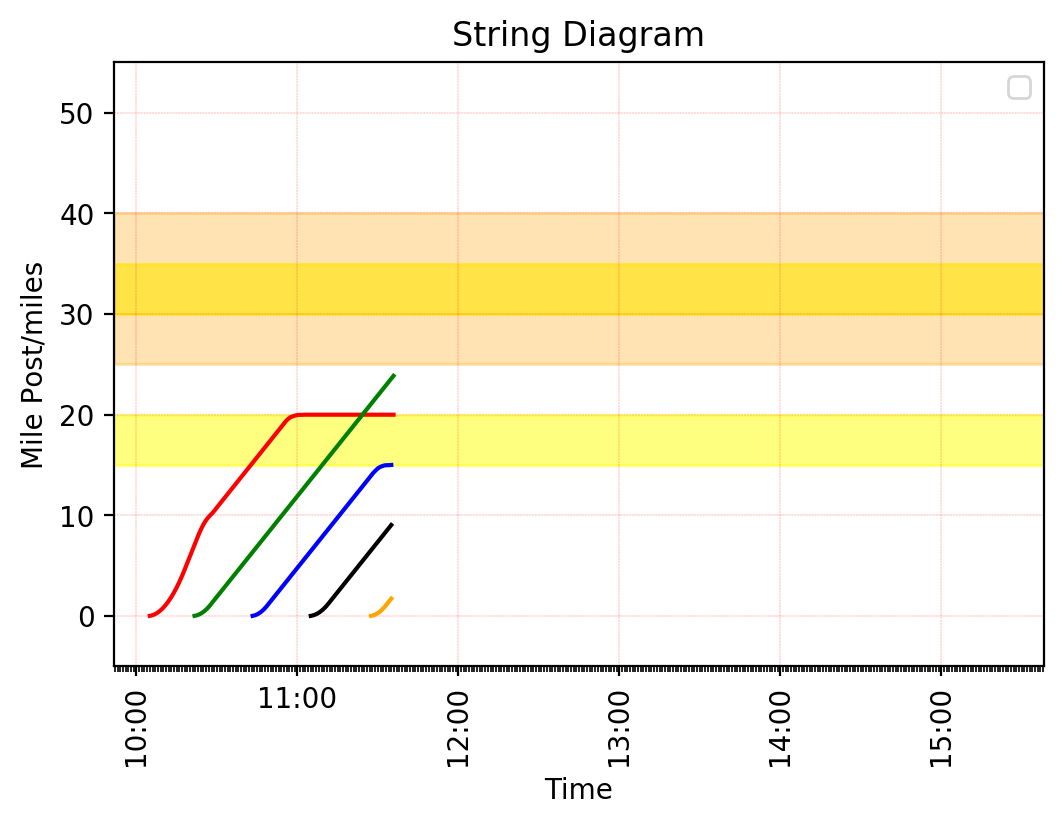

AssertionError: 
	Assertion Error: braking distance 0.0345679012345679 at 14.990073779589434 
	is greater than distance (0.009926220410566344) to current signal HomeSig port: 0 of CtrlPnt 3, aspect Aspect: r, 	 route None, target speed 0.0 mph
	Train idx: 2 occupying:[((CtrlPnt 2, 1), (CtrlPnt 3, 0))] head MP:14.99 rear MP:13.99

In [3]:
# Init Launch
sys = launch(sys=sys, downtrain=True, same_train_set=True)
string_diagram(sys)
if _exception:
    raise _exception

In [ ]:
speed_curve(sys,sys.trains[1])

In [ ]:
# 2nd Launch
sys = launch(sys=sys, downtrain=True, same_train_set=True)
string_diagram(sys)

In [ ]:
max_spd_list = [trn.max_spd for trn in sys.trains]
max_spd_list

In [ ]:
max_acc_list = [trn.max_acc for trn in sys.trains]
max_acc_list

In [ ]:
max_dcc_list = [trn.max_dcc for trn in sys.trains]
max_dcc_list

In [ ]:
for t0, t1 in zip(sys.trains[0:], sys.trains[1:]):
    print(t1.entry_time - t0.entry_time)

In [ ]:
[(datetime.fromtimestamp(t), x) for [t, x] in sys.trains[0].time_pos_list]

In [ ]:
trn1 = sys.trains[1]
trn1

In [ ]:
sys.dispatcher.request_routing(trn1)

In [ ]:
trn1.curr_sigpoint

In [ ]:
trn1.init_segment

In [ ]:
trn1.curr_sig.__dict__

In [ ]:
trn0 = sys.trains[0]
trn0

In [ ]:
trn0.curr_sig.__dict__

In [ ]:
trn1.curr_spd_lmt_abs * 3600

In [ ]:
trn1.curr_sig.curr_spd_lmt_abs.target_speed

In [ ]:
_tgt_MP = trn1.curr_sig.MP if trn1.curr_sig else _direction_sign * float('inf')

In [ ]:
trn1.curr_MP

In [ ]:
trn1.acc_before_dcc(0, 5, 0, trn1.curr_target_spd_abs)

In [ ]:
trn1.sign_MP(trn1.curr_routing_path_segment)

In [ ]:
trn1.curr_target_spd_abs

In [ ]:
trn1.curr_spd_lmt_abs